In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def converter(instr):
    return np.fromstring(instr[1:-1],sep=' ')

In [3]:
#read in my data. There are 3 
df = pd.read_csv('train_data.txt', converters={'xvalues':converter, 'ymeasured':converter})
print(len(df['xvalues']))

1785


In [4]:
lengths = []

for i, row in df.iterrows():
    #print(row["ispeaks"])
    if row["ispeaks"] == 'y':
        #print('debug')
        row["ispeaks"] = 1
    else: row["ispeaks"] = 0
        
    lengths.append(len(row['ymeasured']))
    
#df.head()
#print(df["ispeaks"])
maxlen = max(lengths)
#maxlen

In [20]:
import keras
from sklearn.model_selection import train_test_split

labels_and_features_df = df
labels_arr = labels_and_features_df["ispeaks"]
labels_arr = labels_arr.astype('int64')
#for element in labels_arr:
#    if element != 0:
#        print(element)

labels_arr = keras.utils.to_categorical(labels_arr)

print(labels_arr)

features_arr = []

for i, row in df.iterrows():
    ymeas = []
    for val in row[1]:
        ymeas.append(val)
    while len(ymeas) != maxlen:
        ymeas.append(0)
        
    ymeas = np.array(ymeas)
    features_arr.append(ymeas)
    
features_arr = np.array(features_arr)

features_arr = np.expand_dims(features_arr, axis=2) # reshape (569, 30) to (569, 30, 1) 



#print(np.shape(features_arr))

X_train, X_test, y_train, y_test = train_test_split(features_arr, labels_arr, test_size=0.30)

np.shape(X_train)
#print(y_train)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


(1249, 994, 1)

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, Conv2D, Flatten, MaxPooling1D

model = Sequential()
#model.add(Dense(units=200, activation='sigmoid', input_shape = (maxlen, 1)))

#now input can be set as 
model.add(Conv1D(filters = 3,kernel_size = 3,activation='relu',input_shape=(maxlen, 1)))
model.add(MaxPooling1D(pool_size=(3)))

model.add(Conv1D(filters = 3,kernel_size = 3,activation='relu'))
model.add(MaxPooling1D(pool_size=(3)))

model.add(Flatten())


#model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=2, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [35]:
history =model.fit(X_train,y_train,epochs = 30,validation_split=0.20)
metric_arr = model.evaluate(X_test,y_test)

print("Loss: " + str(metric_arr[0]), "\nAccuracy: " + str(metric_arr[1]))

Train on 999 samples, validate on 250 samples
Epoch 1/30
999/999 [==============================] - 0s 182us/step - loss: 0.3683 - acc: 0.8589 - val_loss: 0.3953 - val_acc: 0.8600
Epoch 2/30
999/999 [==============================] - 0s 176us/step - loss: 0.3460 - acc: 0.8634 - val_loss: 0.3720 - val_acc: 0.8700
Epoch 3/30
999/999 [==============================] - 0s 177us/step - loss: 0.3085 - acc: 0.8824 - val_loss: 0.3550 - val_acc: 0.8780
Epoch 4/30
999/999 [==============================] - 0s 193us/step - loss: 0.2895 - acc: 0.8974 - val_loss: 0.3438 - val_acc: 0.8860
Epoch 5/30
999/999 [==============================] - 0s 179us/step - loss: 0.2771 - acc: 0.9114 - val_loss: 0.3384 - val_acc: 0.8900
Epoch 6/30
999/999 [==============================] - 0s 180us/step - loss: 0.2694 - acc: 0.9134 - val_loss: 0.3346 - val_acc: 0.8920
Epoch 7/30
999/999 [==============================] - 0s 180us/step - loss: 0.2634 - acc: 0.9144 - val_loss: 0.3303 - val_acc: 0.8920
Epoch 8/30
999/9

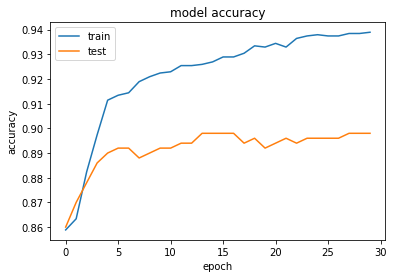

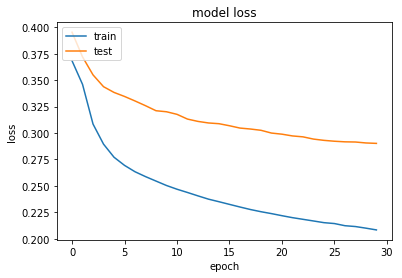

In [36]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
#overall normal sets of peaks are 86% of the total.

predicted peaks


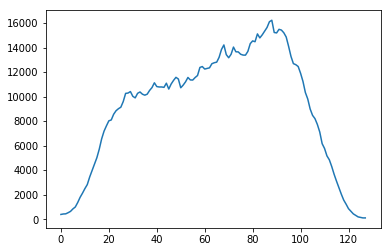

predicted peaks


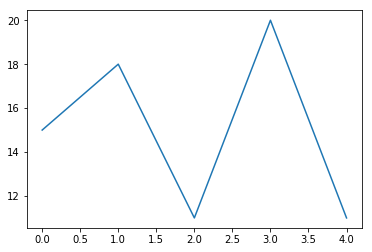

predicted peaks


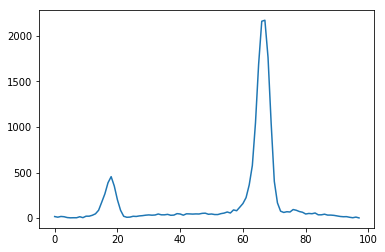

predicted contaminant


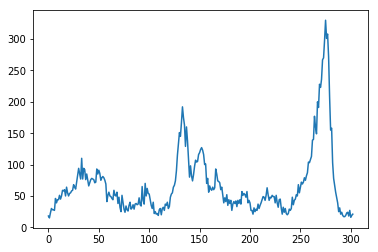

predicted peaks


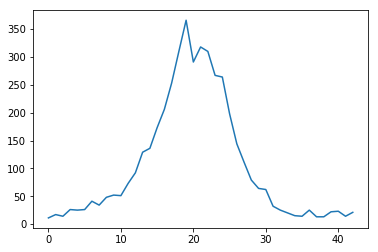

predicted peaks


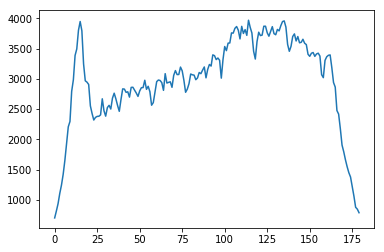

predicted peaks


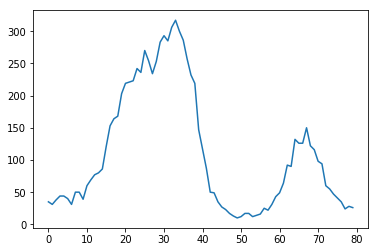

predicted peaks


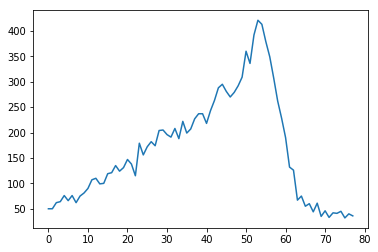

predicted contaminant


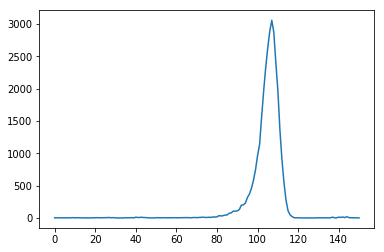

predicted peaks


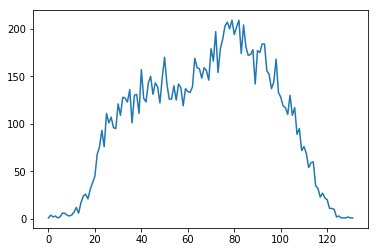

predicted peaks


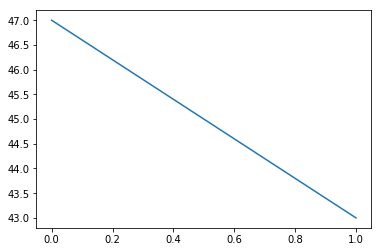

predicted contaminant


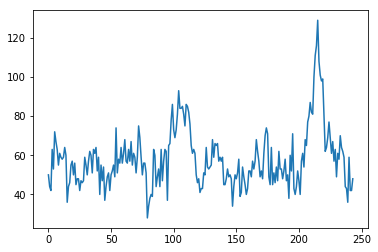

predicted peaks


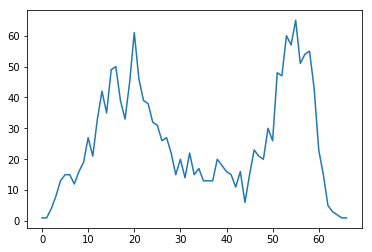

predicted peaks


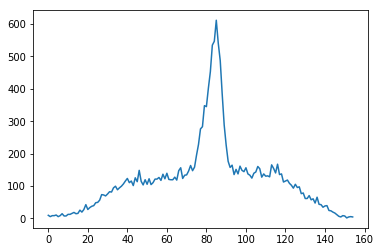

predicted contaminant


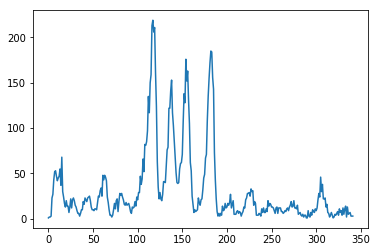

predicted peaks


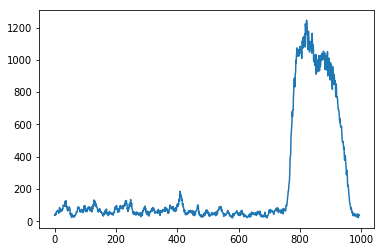

predicted peaks


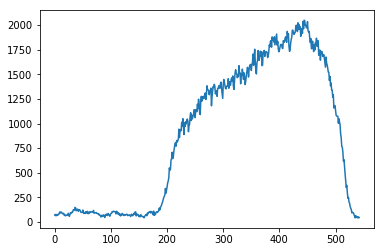

predicted peaks


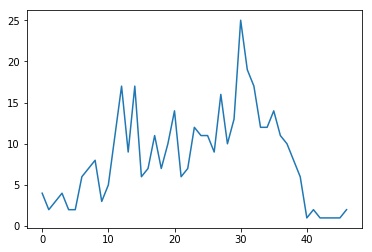

predicted peaks


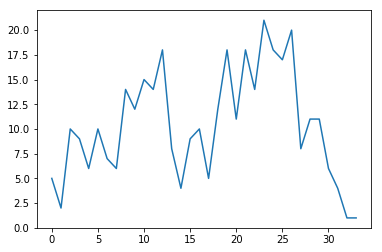

predicted peaks


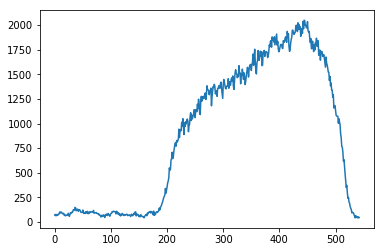

predicted contaminant


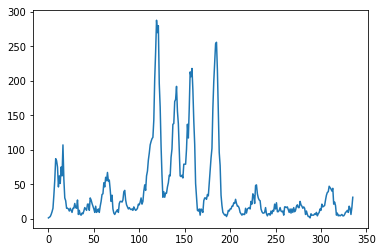

predicted peaks


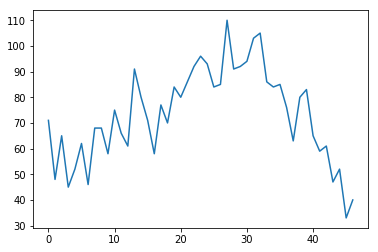

predicted contaminant


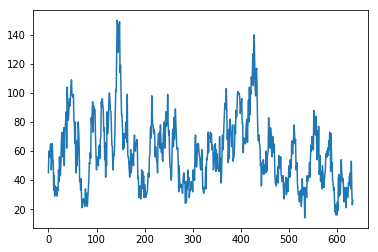

predicted peaks


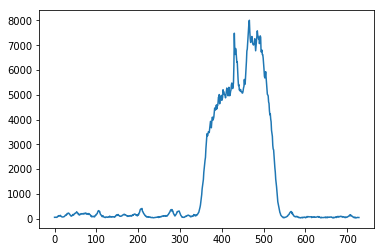

predicted peaks


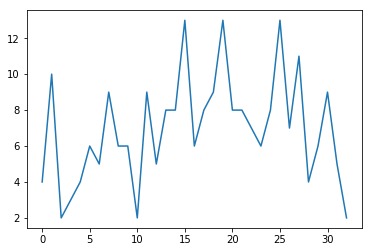

predicted peaks


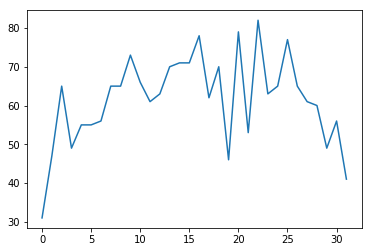

predicted contaminant


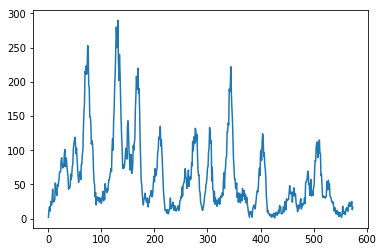

predicted peaks


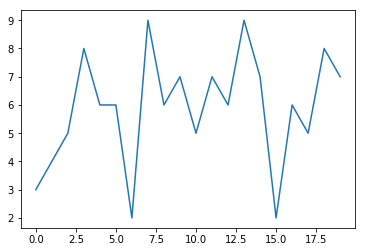

predicted contaminant


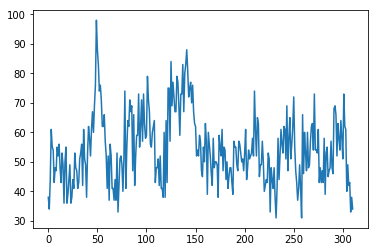

predicted peaks


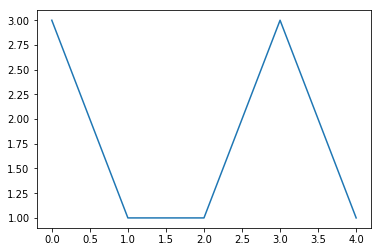

predicted contaminant


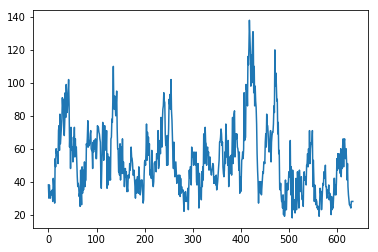

predicted peaks


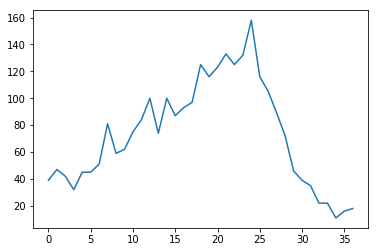

In [38]:
ypred = model.predict(X_test, verbose = 0)

wrong_indices = []

for i in range(len(ypred)):

    if ypred[i][0] > ypred[i][1]:
        ypred[i] = [1.,0.]
    else:
        ypred[i] = [0.,1.]
    
    #print(ypred[i], y_test[i], ypred[i] == y_test[i])
    if ypred[i][0] != y_test[i][0]:
        wrong_indices.append(i)
        
#print(wrong_indices)

#print(X_test)

for i in wrong_indices:
    y = np.delete(X_test[i], np.where(X_test[i] == 0))
    
    plt.plot(np.arange(len(y)), y)
    if ypred[i][0] == 1:
        print('predicted contaminant')
    else:
        print('predicted peaks')
    plt.show()

Confusion matrix, without normalization
[[ 47  23]
 [  9 457]]


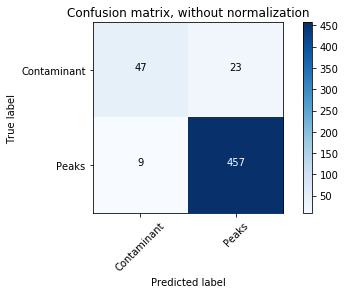

In [39]:
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
y_prob=model.predict(X_test)
y_pred = y_prob.argmax(axis=-1)
y_test_labels = y_test.argmax(axis=-1)
cnf_matrix=confusion_matrix(y_test_labels, y_pred)
class_names = ['Contaminant','Peaks']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')